# Eigenmodes

In this tutorial, we compute and relax a skyrmion in an interfacial-DMI material thin film using periodic boundary conditions.

In [1]:
import oommfc as mc
import discretisedfield as df
import micromagneticmodel as mm
import micromagneticdata as md

We define mesh in cuboid through corner points `p1` and `p2`, and discretisation cell size `cell`. To define periodic boundary conditions, we pass an additional argument `pbc`. This argument can be any iterable (list, tuple, string, set) containing strings `'x'`, `'y'`, and/or `'z'`. Let us assume we want the periodic boundary conditions in $x$ and $y$ directions.

In [2]:
region = df.Region(p1=(-50e-9, -50e-9, 0), p2=(50e-9, 50e-9, 10e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9))

Now, we can define the system object:

In [3]:
system = mm.System(name='skyrmion')

system.energy = (mm.Exchange(A=1.6e-11)
               + mm.DMI(D=4e-3, crystalclass='Cnv') 
               + mm.UniaxialAnisotropy(K=0.51e6, u=(0, 0, 1)) 
               + mm.Zeeman(H=(0, 0, 0.2e5)))
system.dynamics = mm.Precession(gamma0=mm.consts.gamma0) + mm.Damping(alpha=1e-5)

Ms = 1.1e6

def m_init(pos):
    x, y, z = pos
    if (x**2 + y**2)**0.5 < 10e-9:
        return (0, 0, -1)
    else:
        return (0, 0, 1)
    

# create system with above geometry and initial magnetisation
system.m = df.Field(mesh, dim=3, value=m_init, norm=Ms)

Finally we can minimise the energy and plot the magnetisation.

Running OOMMF (ExeOOMMFRunner) [2020/07/01 17:03]... (2.1 s)


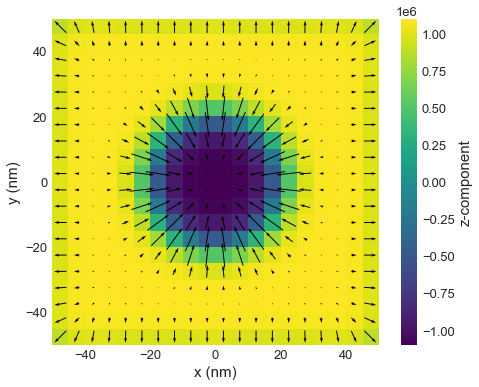

In [4]:
# minimize the energy
md = mc.MinDriver()
md.drive(system)

# Plot relaxed configuration: vectors in z-plane
system.m.plane('z').mpl()

In [5]:
sinc_pulse = mm.Zeeman(H=(0, 0, 1e4), wave='sinc', f=5e9, t0=2.5e-9, name='sinc')
system.energy += sinc_pulse

td = mc.TimeDriver()
td.drive(system, t=5e-9, n=200)

Running OOMMF (ExeOOMMFRunner) [2020/07/01 17:03]... (11.6 s)


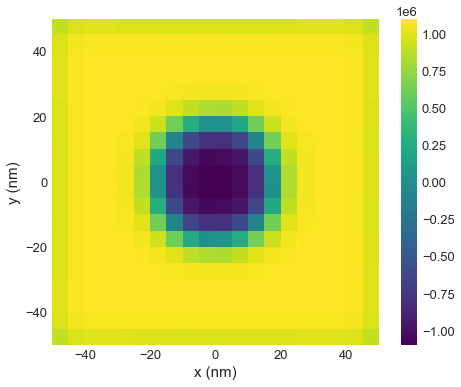

In [6]:
# Plot z-component only:
system.m.z.plane('z').mpl()

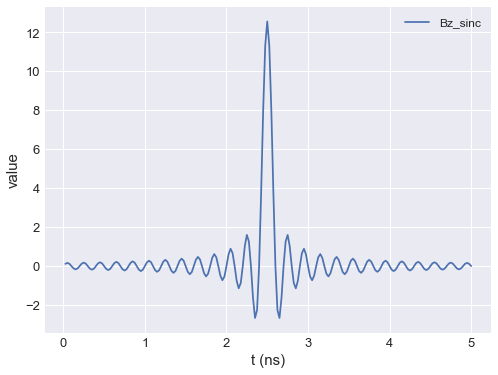

In [7]:
system.table.mpl(yaxis=['Bz_sinc'])

In [8]:
system.energy = (mm.Exchange(A=1.6e-11)
               + mm.DMI(D=4e-3, crystalclass='Cnv') 
               + mm.UniaxialAnisotropy(K=0.51e6, u=(0, 0, 1)) 
               + mm.Zeeman(H=(0, 0, 0.2e5)))

td = mc.TimeDriver()
td.drive(system, t=5e-9, n=1000)

Running OOMMF (ExeOOMMFRunner) [2020/07/01 17:03]... (28.6 s)


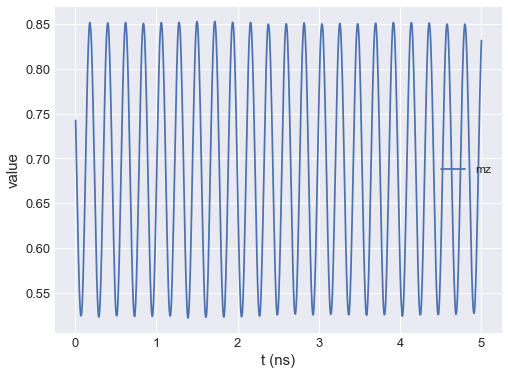

In [9]:
system.table.mpl(yaxis=['mz'])

(4.0, 7.0)

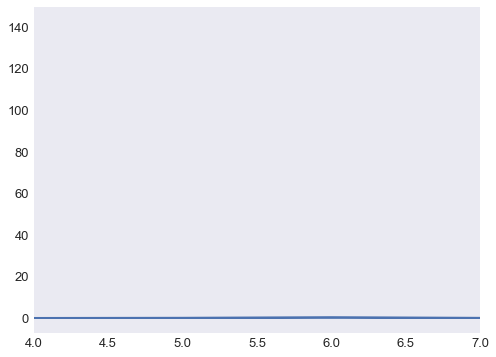

In [23]:
import numpy as np
import matplotlib.pyplot as plt

mz = system.table.data['mz'].to_numpy()
psd = np.abs(np.fft.fft(mz))
f = np.fft.fftfreq(n=len(psd), d=5e-9/1000)

plt.plot(f/1e9, np.abs(np.fft.fft(mz)))
plt.xlim([4, 7])

Running OOMMF (ExeOOMMFRunner) [2020/07/01 17:03]... (1.7 s)


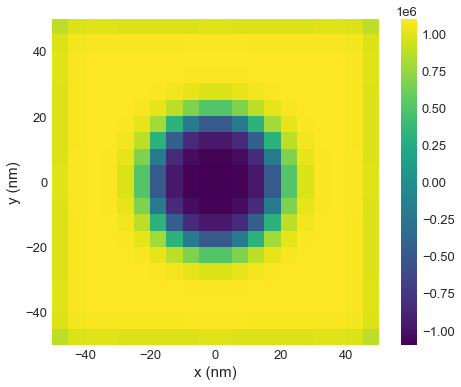

In [11]:
md.drive(system)

system.m.z.plane('z').mpl()

In [12]:
system.energy += mm.Zeeman(H=(0, 0, 1e3), wave='sin', f=1.15e9, t0=0, name='sin')

td.drive(system, t=5e-9, n=200)

Running OOMMF (ExeOOMMFRunner) [2020/07/01 17:04]... (12.6 s)


In [13]:
import micromagneticdata as md

data = md.Data(system.name)
data.info

,drive_number,date,time,driver,t,n
0,0,2020-07-01,10:56:40,MinDriver,NaN,NaN
1,1,2020-07-01,10:59:31,MinDriver,NaN,NaN
2,2,2020-07-01,10:59:53,MinDriver,NaN,NaN
3,3,2020-07-01,11:00:24,MinDriver,NaN,NaN
4,4,2020-07-01,11:00:26,TimeDriver,3.000000e-09,300.0
5,5,2020-07-01,11:01:32,MinDriver,NaN,NaN
6,6,2020-07-01,11:01:35,TimeDriver,3.000000e-09,300.0
7,7,2020-07-01,11:02:21,MinDriver,NaN,NaN
8,8,2020-07-01,11:02:24,TimeDriver,3.000000e-09,300.0
9,9,2020-07-01,11:03:34,MinDriver,NaN,NaN
